<a href="https://colab.research.google.com/github/cann-emma/myfork-3001labs/blob/main/05_PCA/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

In [1]:
!git clone "https://github.com/DS3001/PCA.git"

Cloning into 'PCA'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 45 (delta 5), reused 3 (delta 3), pack-reused 35 (from 1)
Receiving objects: 100% (45/45), 2.47 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (10/10), done.


### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [2]:
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
df= pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

In [5]:
print(df.shape)
print(df.columns.to_list())
df.head()

(18634, 4)
['index', 'Unnamed: 0', 'Email Text', 'Email Type']


index  Unnamed: 0                                         Email Text  \
0      0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1      1           1  the other side of * galicismos * * galicismo *...   
2      2           2  re : equistar deal tickets are you still avail...   
3      3           3  \nHello I am your hot lil horny toy.\n    I am...   
4      4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email

In [6]:
safe= df['Email Text'][2]
phish= df['Email Text'][4]
print(f'Safe Email: {safe}')
print(f'Phish Email: {phish}')

Safe Email: re : equistar deal tickets are you still available to assist robert with entering the new deal tickets for equistar ? after talking with bryan hull and anita luong , kyle and i decided we only need 1 additional sale ticket and 1 additional buyback ticket set up . - - - - - - - - - - - - - - - - - - - - - - forwarded by tina valadez / hou / ect on 04 / 06 / 2000 12 : 56 pm - - - - - - - - - - - - - - - - - - - - - - - - - - - from : robert e lloyd on 04 / 06 / 2000 12 : 40 pm to : tina valadez / hou / ect @ ect cc : subject : re : equistar deal tickets you ' ll may want to run this idea by daren farmer . i don ' t normally add tickets into sitara . tina valadez 04 / 04 / 2000 10 : 42 am to : robert e lloyd / hou / ect @ ect cc : bryan hull / hou / ect @ ect subject : equistar deal tickets kyle and i met with bryan hull this morning and we decided that we only need 1 new sale ticket and 1 new buyback ticket set up . the time period for both tickets should be july 1999 - forwa

In [7]:
print(df['Email Type'].unique())
df.isna().sum()

['Safe Email' 'Phishing Email']


index         0
Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [8]:
Phishing= df[df['Email Type']== 'Phishing Email']
Phishing.head()

index  Unnamed: 0                                         Email Text  \
3       3           3  \nHello I am your hot lil horny toy.\n    I am...   
4       4           4  software at incredibly low prices ( 86 % lower...   
7       7           7  entourage , stockmogul newsletter ralph velez ...   
8       8           8  we owe you lots of money dear applicant , afte...   
10     10          10  make her beg you to give it to her everynight ...   

        Email Type  
3   Phishing Email  
4   Phishing Email  
7   Phishing Email  
8   Phishing Email  
10  Phishing Email

In [9]:
tokens= Phishing['Email Text'].str.split()
tokens

3        [Hello, I, am, your, hot, lil, horny, toy., I,...
4        [software, at, incredibly, low, prices, (, 86,...
7        [entourage, ,, stockmogul, newsletter, ralph, ...
8        [we, owe, you, lots, of, money, dear, applican...
10       [make, her, beg, you, to, give, it, to, her, e...
                               ...                        
18618    [congratulations, you, have, won, !, !, !, pls...
18621                                              [empty]
18622    [strong, buy, alert, :, monthly, newsletter, t...
18629    [date, a, lonely, housewife, always, wanted, t...
18633                                              [empty]
Name: Email Text, Length: 7312, dtype: object

In [10]:
tokens_list= tokens.to_list()
tokens_list

[['Hello',
  'I',
  'am',
  'your',
  'hot',
  'lil',
  'horny',
  'toy.',
  'I',
  'am',
  'the',
  'one',
  'you',
  'dream',
  'About,',
  'I',
  'am',
  'a',
  'very',
  'open',
  'minded',
  'person,',
  'Love',
  'to',
  'talk',
  'about',
  'and',
  'any',
  'subject.',
  'Fantasy',
  'is',
  'my',
  'way',
  'of',
  'life,',
  'Ultimate',
  'in',
  'sex',
  'play.',
  'Ummmmmmmmmmmmmm',
  'I',
  'am',
  'Wet',
  'and',
  'ready',
  'for',
  'you.',
  'It',
  'is',
  'not',
  'your',
  'looks',
  'but',
  'your',
  'imagination',
  'that',
  'matters',
  'most,',
  'With',
  'My',
  'sexy',
  'voice',
  'I',
  'can',
  'make',
  'your',
  'dream',
  'come',
  'true...',
  'Hurry',
  'Up!',
  'call',
  'me',
  'let',
  'me',
  'Cummmmm',
  'for',
  'you..........................',
  'TOLL-FREE:',
  '1-877-451-TEEN',
  '(1-877-451-8336)For',
  'phone',
  'billing:',
  '1-900-993-2582',
  '--',
  '_______________________________________________',
  'Sign-up',
  'for',
  'your',
  '

To prepare the data, I will preprocess the data removing stop words, such as punctuation, frequently used words like "and" and "the," as well as numbers. Next, I will one-hot encode the tokens from each email to create predictors for the model. Using these features, I will apply Principal component analysis and a linear model to determine scam emails from legit ones.

### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [11]:
with open('/content/PCA/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

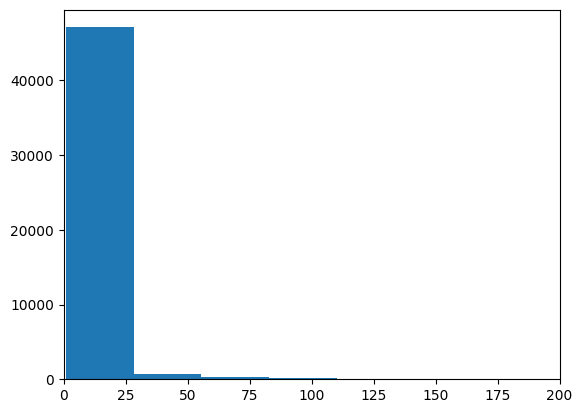

In [12]:
gdf = pd.DataFrame(token_freq,columns=['token','count'])
gdf['count'].hist(grid=False,bins=50)
plt.xlim(0,200)
plt.show()

In [13]:
gdf
print(max(gdf['count']))
gdf.describe()

1365


count
count  48691.000000
mean       5.687889
std       27.717476
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max     1365.000000

In [14]:
gdf['token'].nunique()

48691

### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [15]:
phishing_clean= pd.read_parquet('/content/PCA/05_PCA/Phishing_clean.parquet')

In [16]:
phishing_clean.head()

Email Type  new  date  get  please  enron  like  2002  would  one  ...  \
0           0    0     0    0       0      0     0     0      0    0  ...   
1           0    0     0    0       0      0     0     0      0    0  ...   
2           0    1     0    0       0      0     0     0      0    0  ...   
3           1    0     0    0       0      0     0     0      0    1  ...   
4           1    0     0    0       0      0     0     0      0    0  ...   

   ï¿½ï¿½  safety  yap  ypil  maintain  procedures  tip  elizabeth  \
0       0       0    0     0         0           0    0          0   
1       0       0    0     0         0           0    0          0   
2       0       0    0     0         0           0    0          0   
3       0       0    0     0         0           0    0          0   
4       0       0    0     0         0           0    0          0   

   leadership  italian  
0           0        0  
1           0        0  
2           0        0  
3           0        0  
4           0        0  

[5 rows x 2712 columns]

In [17]:
y= phishing_clean['Email Type']
X= phishing_clean.drop(columns= 'Email Type', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)
lm_0 = LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat_test_0 = lm_0.predict(X_test)
y_hat_train_0 = lm_0.predict(X_train)
print('train: ', r2_score(y_hat_train_0,y_train) )
print('test: ', r2_score(y_hat_test_0,y_test) )

train:  0.6247069991348556
test:  -4.7744715939268545e-05


In [18]:
rdf = pd.DataFrame({'variable':lm_0.feature_names_in_ , 'value':lm_0.coef_})
rdf['abs'] = np.abs(rdf['value'])
rdf.sort_values('abs',ascending=False)

variable         value           abs
74         2002,  1.220497e+13  1.220497e+13
1014        8859 -8.298006e+12  8.298006e+12
340         2005 -5.779494e+12  5.779494e+12
915          300  5.171208e+12  5.171208e+12
1133         19,  4.791183e+12  4.791183e+12
...          ...           ...           ...
757      regards  2.517700e-04  2.517700e-04
752   processing -2.136230e-04  2.136230e-04
2558         09,  2.166366e-05  2.166366e-05
64          week  1.525879e-05  1.525879e-05
2642         301  3.325046e-11  3.325046e-11

[2711 rows x 3 columns]

In [19]:
rdf['abs'].max()

12204974908559.975

The variables with the largest absolute values that are likely to influence predictions seem to be numbers

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

<Axes: >

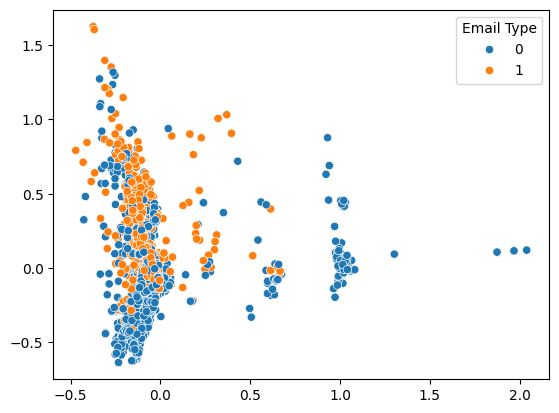

In [20]:
reduction = PCA(n_components=2).fit(X_train)
Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)
sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test)

The orange dots, which represent the scam emails, tend to have a higher second component(y-axis) and a lower first component(x-axis).

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [21]:
reduction = PCA(n_components=2610).fit(X_train)
Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)

lm_k = LinearRegression().fit(Z_train,y_train)
y_hat_test = lm_k.predict(Z_test)
y_hat_train = lm_k.predict(Z_train)

print('Train r2: ', r2_score(y_hat_train,y_train) )
print('Test r2: ', r2_score(y_hat_test,y_test) )

Train r2:  0.6967854877754098
Test r2:  0.5761002613787811


The performance is so much better compared to the linear regression model. The effect size for the training and testing data is closer in this model.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

Using principal components for high-dimensional regression reduces the number of variables while retaining most of the variance in the data. This means that our model is more efficient because it has learnt a lot about the data using less variables and time. All this variance retention occurs while eliminating multicollineraty, thereby increasing the indepedence of variables in the model and increasing the predictive power of our model.
